# Quadrature

**Scott Prahl**

**May 2024**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import iadpython.quadrature
%config InlineBackend.figure_format='retina'

## What is quadrature and why is it relevant?

The adding-doubling method is based on numerical integration
of functions using quadrature,

$$
\int_0^1 f(\nu,\nu') \, d\nu' = \sum_{i=1}^{N} w_i f(x_i)
$$

The values of the quadrature points $x_i$ and the weights
$w_i$ are chosen in such a way that the integral is evaluated
exactly for a polynomial of order $2N-1$ (or possibly $2N-2$ depending
on the quadrature method).  Using $N$ quadrature points (Gaussian)
is equivalent to the spherical harmonic method of order $P_{N-1}$,
i.e. four quadrature points corresponds to the $P_3$
method.  The specific choice of quadrature methods for samples
with mismatched boundaries is described in the next section.

Total internal reflection causes problems by changing the effective
range of integration. Usually, adding-doubling integrals range from
$0$ to $1$, since the angle varies from ${\pi\over2}$ to $0$ and
therefore the cosine varies from $0$ to $1$. The integrations are
calculated using numerical quadrature, and the quadrature angles are
optimized for this range. If the cosine of the critical angle is
denoted by $\nu_c$ for a boundary layer with total internal
reflection, then the effective range of integration is reduced to
$\nu_c$ to $1$ (because the rest of the integration range is now
zero). To maintain integration accuracy, the integral is broken into
two parts and each is evaluated by quadrature over the specified
subrange,

$$
\int_0^1A(\nu,\nu') B(\nu',\nu'')\,d\nu'  =
          \int_0^{\nu_c}A(\nu,\nu') B(\nu',\nu'')\,d\nu' +
             \int_{\nu_c}^1 A(\nu,\nu') B(\nu',\nu'')\,d\nu' .
$$

Here $A(\nu,\nu')$ and $B(\nu,\nu')$ represent reflection or
transmission functions, and clearly if either is identically
zero for values of $\nu$ less than $\nu_c$, the integration range is
reduced. 

Each integral is handled with a different quadrature scheme. Specifically the calculations used Gaussian quadrature for integrals
over the range from $0$ to $\nu_c$, thereby avoiding calculations at both endpoints (in particular, the angle $\nu=0$ is avoided, which may cause division by zero). 

Radau quadrature is used for the range from $\nu_c$ to $1$, so $\nu=1$ will be one of the quadrature point points.  Each part of the integration range gets half of the quadrature points; when no critical angle exists, Radau quadrature is used over the entire range.

### Gaussian-Legendre Quadrature

$$
\int _{-1}^{1}f(x)\,dx\approx \sum _{i=1}^{n}w_{i}f(x_{i})
$$

Gauss nodes $x_i$ are the roots of the nth Legendre polynomial $P_n(x)$.  The weights $w_i$ are
$$
w_i = \frac{1}{(1-x_i^2)[P_n'(x_i)]^2}
$$

The implementation in `iadpython.quadrature` does the proper scaling of the weights and abscissa so that one can solve the more general integral

$$
\int _{a}^{b}f(x)\,dx\approx \sum _{i=1}^{n}w_{i}f(x_{i})
$$


In [2]:
help(iadpython.quadrature.gauss)

Help on function gauss in module iadpython.quadrature:

gauss(n, a=-1, b=1)
    Return abscissas and weights for Gaussian quadrature.

    The definite integral ranges from a to b.  The default
    interval is -1 to 1.  The quadrature approximation is
    just the sum of :math:`w_i f(x_i)`.  Neither a nor b is included
    in the list of quadrature abscissas.

    The result should be exact when integrating any polynomial
    of degree 2n-1 or less.

    If -a=b, then abscissas will be symmetric about the origin

    Args:
        n: number of quadrature points
        a: lower limit of integral
        b: upper limit of integral
    Returns:
        x: array of abscissas of length n
        w: array of weights of length n



In [3]:
n=8
xi, wi = iadpython.quadrature.gauss(n)

In [4]:
xx=np.empty(8)
ww=np.empty(8)
xx[4]=-0.1834346424956498
xx[3]=0.1834346424956498
xx[5]=-0.5255324099163290
xx[2]=0.5255324099163290
xx[6]=-0.7966664774136267
xx[1]=0.7966664774136267
xx[7]=-0.9602898564975363
xx[0]=0.9602898564975363

ww[4]=0.3626837833783620
ww[3]=0.3626837833783620
ww[5]=0.3137066458778873
ww[2]=0.3137066458778873
ww[6]=0.2223810344533745
ww[1]=0.2223810344533745
ww[7]=0.1012285362903763
ww[0]=0.1012285362903763

ww = np.flip(ww)
xx = np.flip(xx)
print(" i        xi calc         xi ref            wi calc         wi ref")
print("----------------------------------------------------------------------")
for i,x in enumerate(xi):
    print("%2d   %+.12f %+.12f   %+.12f %+.12f" % (i, x, xx[i], wi[i], ww[i]))

 i        xi calc         xi ref            wi calc         wi ref
----------------------------------------------------------------------
 0   -0.960289856498 -0.960289856498   +0.101228536290 +0.101228536290
 1   -0.796666477414 -0.796666477414   +0.222381034453 +0.222381034453
 2   -0.525532409916 -0.525532409916   +0.313706645878 +0.313706645878
 3   -0.183434642496 -0.183434642496   +0.362683783378 +0.362683783378
 4   +0.183434642496 +0.183434642496   +0.362683783378 +0.362683783378
 5   +0.525532409916 +0.525532409916   +0.313706645878 +0.313706645878
 6   +0.796666477414 +0.796666477414   +0.222381034453 +0.222381034453
 7   +0.960289856498 +0.960289856498   +0.101228536290 +0.101228536290


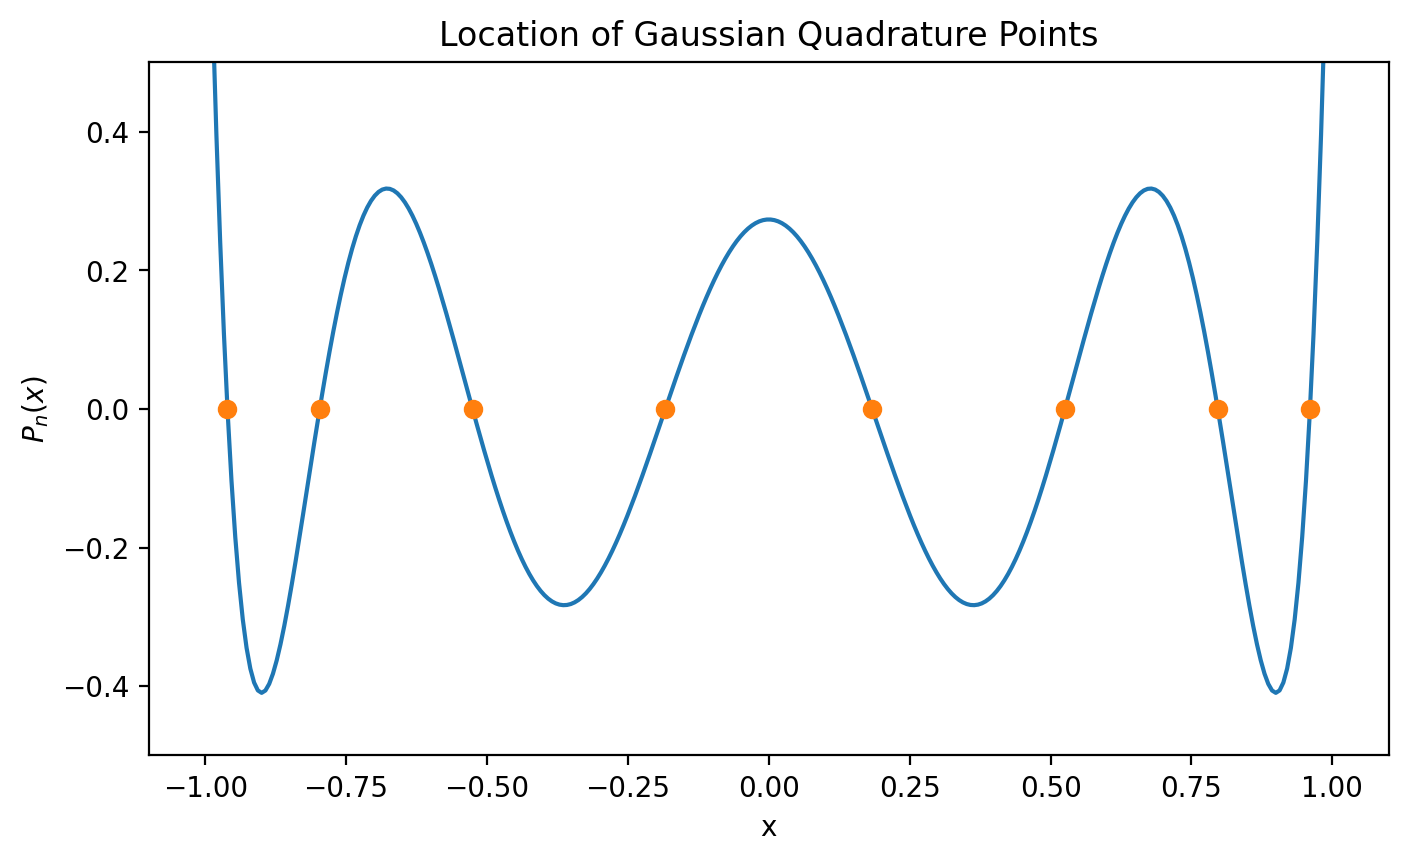

In [5]:
x = np.linspace(-1+1e-10, 1-1e-10, 300)
plt.figure(figsize=(8,4.5))
plt.plot(x, iadpython.quadrature._gauss_func(n, x))
plt.plot(xi, iadpython.quadrature._gauss_func(n, xi), "o")
plt.ylim(-0.5,0.5)
plt.xlabel("x")
plt.ylabel('$P_n(x)$')
plt.title('Location of Gaussian Quadrature Points')
plt.show()

We test the quadrature implementatin using the integral of a sixth-order polynomial. The results should be exactly the same if the number of quadrature points is n=4 since (2n-2=6).

$$
\int_{-7}^2 x^6\,dx = \frac{1}{7} 2^7 - \frac{1}{7} (-7)^7 = \sum_{i=0}^7 x_i^6 w_i 
$$

In [6]:
n=4
xi, wi = iadpython.quadrature.gauss(n, a=-7, b=2)
quad_int = np.sum(xi**6 * wi)
print("integration by quadrature = %12.5f" % quad_int)

anal_int = (2)**7 / 7 - (-7)**7 / 7
print("     analytic integration = %12.5f" % anal_int)

integration by quadrature = 117667.28571
     analytic integration = 117667.28571


### Gauss-Radau Quadrature

#### Solution for integration range from -1 to 1

Radau quadrature is a  Gaussian Quadrature-like formula for numerical estimation of integrals. It requires $m+1$ points and fits all Polynomials to degree $2m$, so it effectively fits exactly all Polynomials of degree $2m-1$. It uses a weighting Function $w(x)=1$ in which the endpoint $-1$ in the interval $[-1,1]$ is included in a total of $n$ Abscissas, giving $r=n-1$ free abscissas. The general formula is 
$$
\int_{-1}^1 f(x) \,dx \approx w_0 f(-1) + \sum_{i=1}^{n-1} w_i f(x_i)
$$

The nodes $x_i$ are given by the $n$ roots of 
$$
P_{n-1}(x_i) + \frac{x_i-1}{n} P_{n-1}'(x_i) =0
$$
Here $P_n(x)$ is the $n$th Legendre polynomial of order zero and
$P_{n-1}'(x_i)$ is the first derivative of the $(n-1)$st Legendre polynomial.
These roots are the required quadrature points distributed within the integration range $-1$ to $1$.  

The weights $w_i=w(x_i)$ are
$$
w_i = \frac{1}{(1-x)[P_n'(x_i)]^2}
$$
with
$$
w_0 = \frac{2}{n^2}
$$

#### Solution for integration range from a to b

Radau quadrature is defined over the range -1 to 1.  The constrained endpoint is usually assumed to be the lower limit of integration or $-1$.  However, we will want the common endpoint to be the upper limit of integration.  Furthermore, we
want to integrate over an arbitrary range of values so we note
$$
\int_a^b f(x) \,dx = - \int_b^a f(x) \,dx
$$
and we do quadrature on the integral on the right hand side
$$
- \int^b_a f(x) \,dx \approx -w_0' f(b) - \sum_{i=1}^{n-1} w_i' f(x_i')
$$

To modify for the range $a$ to $b$ the following relations are
needed to find the necessary quadrature points $x_i$ and weights $w_i$ so that
$$
\int_a^b f(x) \,dx = - \int_b^a f(x) \,dx \approx w_0' f(b) + \sum_{i=1}^{n-1} w_i' f(x_i')
$$
where the new abscissas and weights are
$$
x_i' = \frac{a+b}{2} + \frac{a-b}{2}x_i
$$
and
$$
w_i'=   \frac{b-a}{2} w_i
$$

In [7]:
n=8
xi, wi = iadpython.quadrature.radau(n)

In [8]:
xx=np.empty(8)
ww=np.empty(8)
xx[7]= -1
xx[6]=-0.8874748789261557
xx[5]=-0.6395186165262152 
xx[4]=-0.2947505657736607
xx[3]= 0.0943072526611108 
xx[2]= 0.4684203544308211
xx[1]= 0.7706418936781916
xx[0]= 0.9550412271225750 

ww[7]= 2/(8*8)
ww[6]= 0.1853581548029793
ww[5]= 0.3041306206467856 
ww[4]= 0.3765175453891186 
ww[3]= 0.3915721674524935 
ww[2]= 0.3470147956345014 
ww[1]= 0.2496479013298649 
ww[0]= 0.1145088147442572 

# the provided solutions must be adapted because the lower endpoint is assumed fixed
xx = -xx
print(" i        xi calc         xi ref            wi calc         wi ref")
print("----------------------------------------------------------------------")
for i,x in enumerate(xi):
    print("%2d   %+.12f %+.12f   %+.12f %+.12f" % (i, x, xx[i], wi[i], ww[i]))
          

 i        xi calc         xi ref            wi calc         wi ref
----------------------------------------------------------------------
 0   -0.955041227123 -0.955041227123   +0.114508814744 +0.114508814744
 1   -0.770641893678 -0.770641893678   +0.249647901330 +0.249647901330
 2   -0.468420354431 -0.468420354431   +0.347014795635 +0.347014795635
 3   -0.094307252661 -0.094307252661   +0.391572167452 +0.391572167452
 4   +0.294750565774 +0.294750565774   +0.376517545389 +0.376517545389
 5   +0.639518616526 +0.639518616526   +0.304130620648 +0.304130620647
 6   +0.887474878926 +0.887474878926   +0.185358154809 +0.185358154803
 7   +1.000000000000 +1.000000000000   +0.031250000000 +0.031250000000


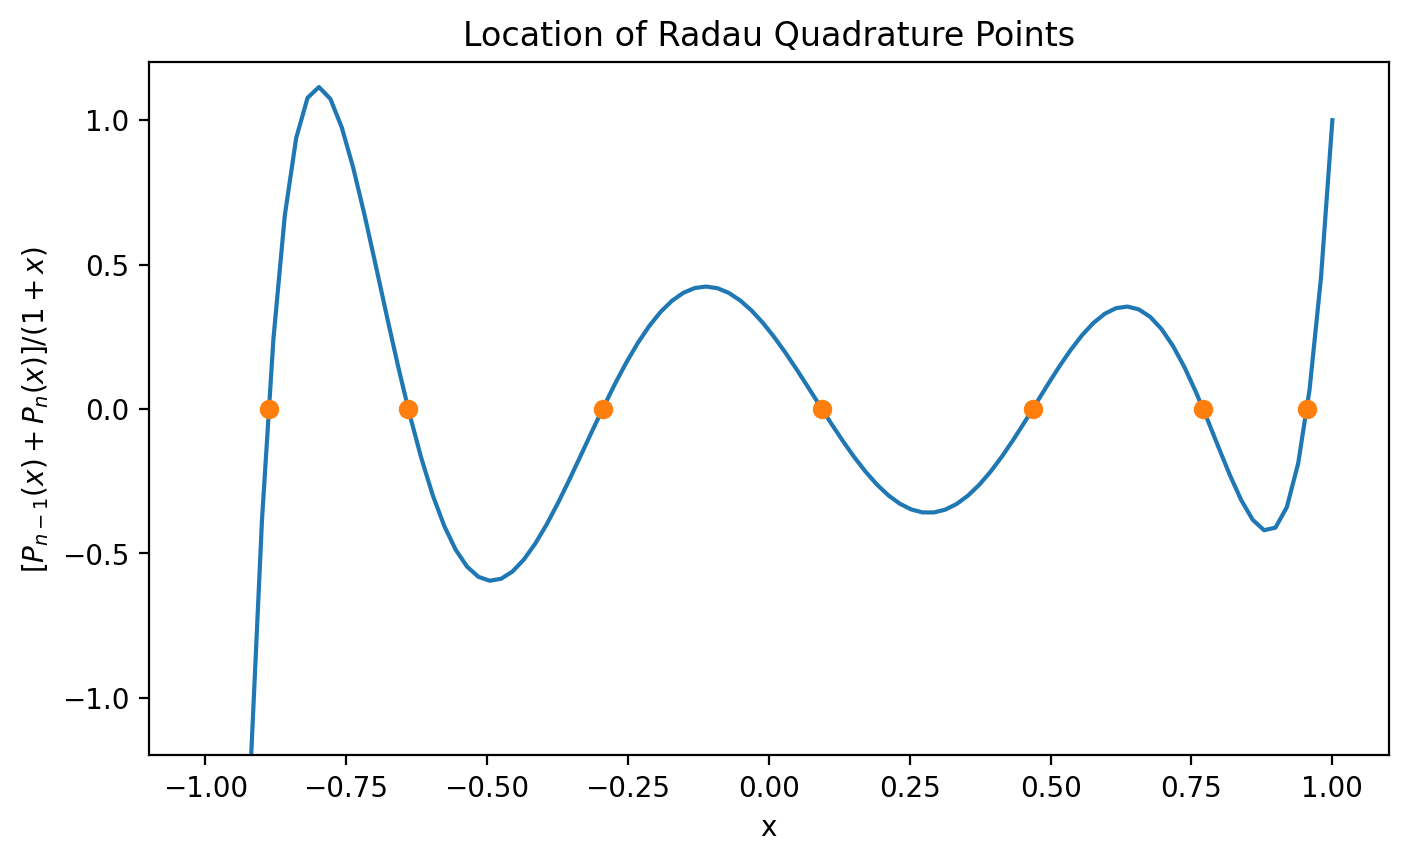

In [9]:
eps = 1e-8
x = np.linspace(-1+eps, 1-eps, 100)
plt.figure(figsize=(8,4.5))
plt.plot(x, iadpython.quadrature._radau_func(n, x))
# have to plot -xi because we fix upper endpoint
plt.plot(-xi[:-1], iadpython.quadrature._radau_func(n, -xi[:-1]), "o")
plt.ylim(-1.2,1.2)
plt.xlabel("x")
plt.ylabel('$[P_{n-1}(x)+P_n(x)]/(1+x)$')
plt.title('Location of Radau Quadrature Points')
plt.show()

We test the quadrature implementatin using the integral of a sixth-order polynomial. The results should be exactly the same if the number of quadrature points is $n=4$ since ($2n-2$=6).

$$
\int_{-7}^2 x^6\,dx = \frac{1}{7} 2^7 - \frac{1}{7} (-7)^7 = \sum_{i=0}^7 x_i^6 w_i 
$$

In [10]:
n=4
xi, wi = iadpython.quadrature.radau(n, a=-7, b=2)
quad_int = np.sum(xi**6 * wi)
print("integration by quadrature = %12.5f" % quad_int)

anal_int = (2)**7 / 7 - (-7)**7 / 7
print("     analytic integration = %12.5f" % anal_int)

integration by quadrature = 117667.28571
     analytic integration = 117667.28571


### Gauss-Lobatto Quadrature

Gauss-Lobatto nodes are (except for the endpoints) the roots of $P'_{n−1}(x)$.
 

In [11]:
n=8
xi, wi = iadpython.quadrature.lobatto(n)

In [12]:
xx=np.empty(8)
ww=np.empty(8)
xx[7]=-1
xx[6]=-0.8717401485096066153375	
xx[5]=-0.5917001814331423021445	
xx[4]=-0.2092992179024788687687	
xx[3]=0.2092992179024788687687	
xx[2]=0.5917001814331423021445	
xx[1]=0.8717401485096066153375	
xx[0]=1	

ww[7]=0.03571428571428571428571
ww[6]=0.210704227143506039383
ww[5]=0.3411226924835043647642
ww[4]=0.4124587946587038815671
ww[3]=0.412458794658703881567
ww[2]=0.341122692483504364764
ww[1]=0.210704227143506039383
ww[0]=0.0357142857142857142857

xi = np.flip(xi)
print(" i        xi calc         xi ref            wi calc         wi ref")
print("----------------------------------------------------------------------")
for i,x in enumerate(xi):
    print("%2d   %+.12f %+.12f   %+.12f %+.12f" % (i, x, xx[i], wi[i], ww[i]))
          

 i        xi calc         xi ref            wi calc         wi ref
----------------------------------------------------------------------
 0   +1.000000000000 +1.000000000000   +0.035714285714 +0.035714285714
 1   +0.871740148510 +0.871740148510   +0.210704227144 +0.210704227144
 2   +0.591700181433 +0.591700181433   +0.341122692484 +0.341122692484
 3   +0.209299217902 +0.209299217902   +0.412458794659 +0.412458794659
 4   -0.209299217902 -0.209299217902   +0.412458794659 +0.412458794659
 5   -0.591700181433 -0.591700181433   +0.341122692484 +0.341122692484
 6   -0.871740148510 -0.871740148510   +0.210704227144 +0.210704227144
 7   -1.000000000000 -1.000000000000   +0.035714285714 +0.035714285714


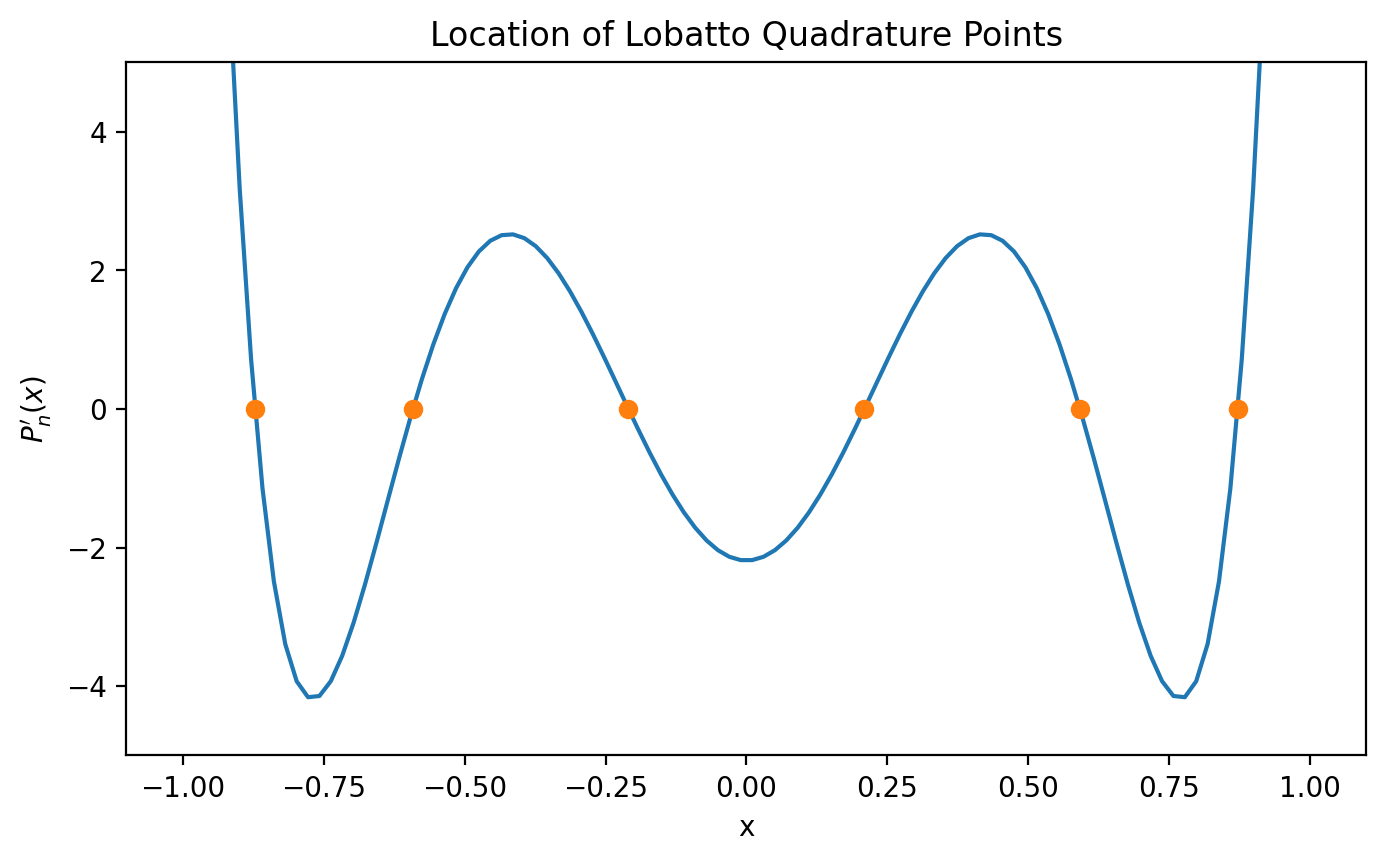

In [13]:
eps = 1e-8
x = np.linspace(-1+eps, 1-eps, 100)

plt.figure(figsize=(8,4.5))
plt.plot(x, iadpython.quadrature._lobatto_func(n,x))
plt.plot(xi[1:-1], iadpython.quadrature._lobatto_func(n,xi[1:-1]), "o")
plt.ylim(-5,5)
plt.xlabel("x")
plt.ylabel("$P_n'(x)$")
plt.title('Location of Lobatto Quadrature Points')
plt.show()

We test the quadrature implementatin using the integral of a sixth-order polynomial. The results should be exactly the same if the number of quadrature points is $n=9$ since ($2n-2=16>15$).

$$
\int_{-7}^2 x^{15}\,dx = \frac{1}{16} 2^{16} - \frac{1}{16} (-7)^{16} = \sum_{i=0}^7 x_i^{15} w_i 
$$

In [14]:
n=9
xi, wi = iadpython.quadrature.lobatto(n, a=-7, b=2)
quad_int = np.sum(xi**15* wi)
print("integration by quadrature = %12.0f" % quad_int)

anal_int = (2)**16 / 16 - (-7)**16 / 16
print("     analytic integration = %12.0f" % anal_int)
print()
print("... which is equal to within the expected numerical accuracy")

integration by quadrature = -2077058156502
     analytic integration = -2077058156504

... which is equal to within the expected numerical accuracy
